# Lead Scoring Case Study

This case study aims to build a predictive analytics model for an education company named X Education, which sells online courses to industry professionals. Here we will try to optimize the sales operation of company by finding out the the most prominent leads out of large dataset of people who interacted with the company website.

We aim to use a logistic regression model to assign lead scores in range 0-100 (higher number indicating most prominent lead) and identify potential customers from the with a higher conversion chance, aiming to increase the lead conversion rate.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')


## Data Collection

* Import File

In [2]:
original_df = pd.read_csv('Leads.csv')

* A Look at it

In [3]:
original_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
print('Row_count-{} and Cols_count-{}'.format(original_df.shape[0], original_df.shape[1]))

Row_count-9240 and Cols_count-37


In [5]:
# describe numerical cols
original_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleanup

* As suggested, imputing 'Select' values with None

In [6]:
original_df.replace('Select', None, inplace=True)

In [7]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Remove Null values

In [8]:
# function to find out null percent
def null_percent(df_name):
    tmp = round((df_name.isnull().sum() / df_name.shape[0]) * 100, 1)
    tmp = tmp[tmp > 0.0]
    return tmp.sort_values(ascending=False)

In [9]:
tmp = null_percent(original_df)
tmp

How did you hear about X Education               78.5
Lead Profile                                     74.2
Lead Quality                                     51.6
Asymmetrique Profile Score                       45.6
Asymmetrique Activity Score                      45.6
Asymmetrique Profile Index                       45.6
Asymmetrique Activity Index                      45.6
City                                             39.7
Specialization                                   36.6
Tags                                             36.3
What matters most to you in choosing a course    29.3
What is your current occupation                  29.1
Country                                          26.6
TotalVisits                                       1.5
Page Views Per Visit                              1.5
Last Activity                                     1.1
Lead Source                                       0.4
dtype: float64

* There are lot of cols with good amount of Null Values. Let's drop cols where null percent is above 30%

In [10]:
drop_above_thirty_df = original_df

In [11]:
# dropping cols with greater than 30% null value
drp_cols = tmp[tmp > 30.0].index.tolist()
drop_above_thirty_df.drop(drp_cols, axis=1, inplace=True)

* Remaining Columns left after removing above 30% nulls

In [12]:
drop_above_thirty_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
null_percent(drop_above_thirty_df)

What matters most to you in choosing a course    29.3
What is your current occupation                  29.1
Country                                          26.6
TotalVisits                                       1.5
Page Views Per Visit                              1.5
Last Activity                                     1.1
Lead Source                                       0.4
dtype: float64

* Still few cols left where we have null values. lets take a look at their value counts and see

In [14]:
tmp = null_percent(drop_above_thirty_df)

for i in tmp.index:
    print(drop_above_thirty_df[i].value_counts())
    print('===========================================')

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region       

* We can impute these cols with there mode value

In [15]:
for i in tmp.index.tolist():
    drop_above_thirty_df[i] = drop_above_thirty_df[i].replace(np.nan, drop_above_thirty_df[i].mode()[0])

In [16]:
null_percent(drop_above_thirty_df)

Series([], dtype: float64)

* Now we have got ridden of all the null values from all the columns.

In [17]:
drop_above_thirty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

* Lets drop Prospect ID and Lead Number as they are just unique values and won't help much in model prediction

In [18]:
no_null_df = drop_above_thirty_df
no_null_df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [19]:
no_null_df.dtypes

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums                                object
Newspaper                                         object
Digital Advertisement          

In [20]:
# continous numerical columns
tmp = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

* Looking at value_counts of all the columns except numerical columns

In [21]:
x = no_null_df.columns.to_list()
for i in tmp:
    x.remove(i)

for i in x:
    print(no_null_df[i].value_counts())
    print('===========================================')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
0    5679
1    3561
Name: Converted, dtype: int64
Email Opened                    3540
SMS Sent                      

We can see that in below columns, we have only one value which is "NO". This won't help in gaining insight from this Dataset as they have NO value for all the rows. So lets go ahead and drop them

* Magazine
* Receive More Updates About Our Courses
* Update me on Supply Chain Content
* Get updates on DM Conten
* I agree to pay the amount through cheque


In [22]:
# dropping columns
no_null_df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1, inplace=True)

### Check Outliers

* Now let's check all the Numerical columns to see if they have any outliers or not

Column Name >> TotalVisits
0.00      0.0
0.01      0.0
0.10      0.0
0.25      0.0
0.50      3.0
0.75      5.0
0.90      7.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64


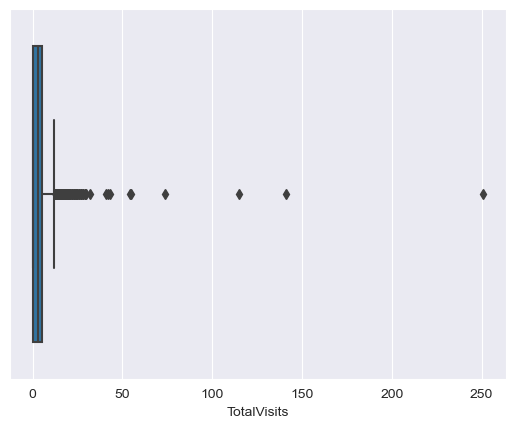

Column Name >> Total Time Spent on Website
0.00       0.00
0.01       0.00
0.10       0.00
0.25      12.00
0.50     248.00
0.75     936.00
0.90    1380.00
0.99    1840.61
1.00    2272.00
Name: Total Time Spent on Website, dtype: float64


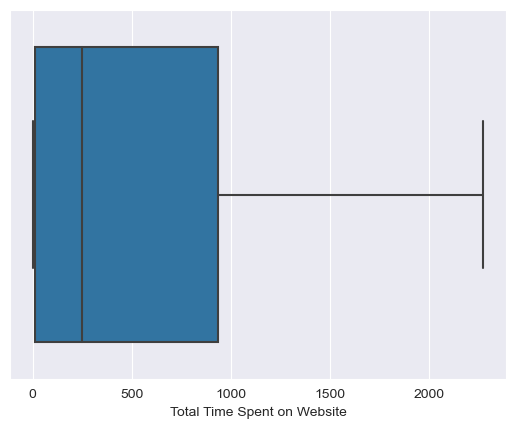

Column Name >> Page Views Per Visit
0.00     0.0
0.01     0.0
0.10     0.0
0.25     0.0
0.50     2.0
0.75     3.0
0.90     5.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64


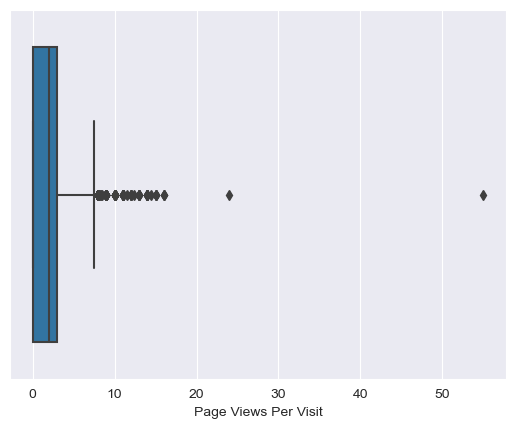

In [23]:
# function to check outliers of numerical cols by plotting boxplot
def chk_outlier(df, col):
    print('Column Name >> {}'.format(col))
    print(df[col].quantile([0, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1]))
    sns.set_style('darkgrid')
    sns.boxplot(df[col])
    plt.show()
    print('===========================================')

# loop to iterate over the continoius numerical columns
for col in tmp:
    chk_outlier(no_null_df, col)

* We can see that Page Views Per Visit is well withing normal range but TotalVisits and Page Views Per Visit has huge outliers. We can see till 99% percentile they have normal data. So lets calculate their IQR and clip them with (Q1 - (IQR * threshold)) and (Q3 + (IQR * threshold))

#### For TotalVisits

In [24]:
# Calculate the IQR
Q1 = no_null_df['TotalVisits'].quantile(0.01)
Q3 = no_null_df['TotalVisits'].quantile(0.99)
IQR = Q3 - Q1

# Set the threshold to identify outliers
threshold = 1.5 * IQR

# Filter out the outliers
no_null_df = no_null_df[(no_null_df['TotalVisits'] >= Q1 - threshold) & (no_null_df['TotalVisits'] <= Q3 + threshold)]

# print df
no_null_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


#### For Page Views Per Visit

In [25]:
# Calculate the IQR
Q1 = no_null_df['Page Views Per Visit'].quantile(0.01)
Q3 = no_null_df['Page Views Per Visit'].quantile(0.99)
IQR = Q3 - Q1

# Set the threshold to identify outliers
threshold = 1.5 * IQR

# Filter out the outliers
no_null_df = no_null_df[(no_null_df['Page Views Per Visit'] >= Q1 - threshold) & (no_null_df['Page Views Per Visit'] <= Q3 + threshold)]

# print df
no_null_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


* Again check for the outliers to see what is the current status

Column Name >> TotalVisits
0.00     0.0
0.01     0.0
0.10     0.0
0.25     0.0
0.50     3.0
0.75     5.0
0.90     7.0
0.99    16.0
1.00    42.0
Name: TotalVisits, dtype: float64


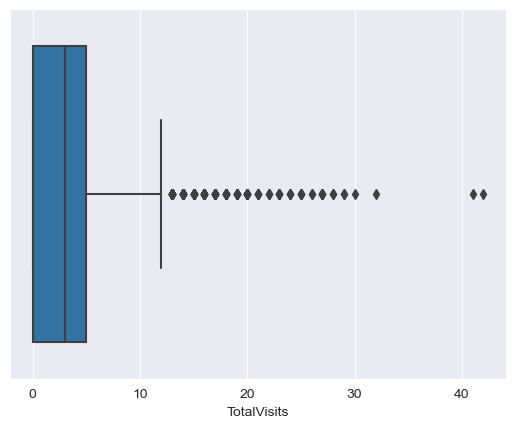

Column Name >> Total Time Spent on Website
0.00       0.00
0.01       0.00
0.10       0.00
0.25      12.00
0.50     248.00
0.75     936.00
0.90    1379.90
0.99    1840.69
1.00    2272.00
Name: Total Time Spent on Website, dtype: float64


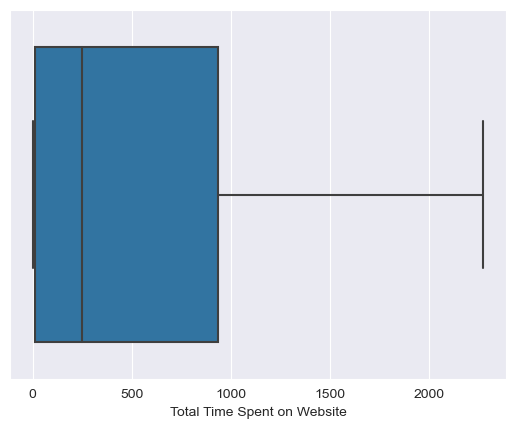

Column Name >> Page Views Per Visit
0.00     0.0
0.01     0.0
0.10     0.0
0.25     0.0
0.50     2.0
0.75     3.0
0.90     5.0
0.99     9.0
1.00    16.0
Name: Page Views Per Visit, dtype: float64


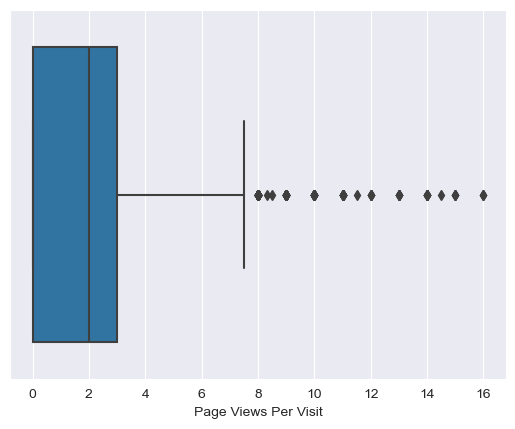

In [26]:
# loop to iterate over the continoius numerical columns
for col in tmp:
    chk_outlier(no_null_df, col)

* Even though there are some values in TotalVisits and Page Views Per Visit which are outiside normal range but those are mostly continous and closly placed from the actual distribution. So we can keep them in our analysis.

In [27]:
no_null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9232 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9232 non-null   object 
 1   Lead Source                                    9232 non-null   object 
 2   Do Not Email                                   9232 non-null   object 
 3   Do Not Call                                    9232 non-null   object 
 4   Converted                                      9232 non-null   int64  
 5   TotalVisits                                    9232 non-null   float64
 6   Total Time Spent on Website                    9232 non-null   int64  
 7   Page Views Per Visit                           9232 non-null   float64
 8   Last Activity                                  9232 non-null   object 
 9   Country                                        9232 

### dtype conversion

In [28]:
# create a list of object column names and append Converted
tmp = no_null_df.select_dtypes(['object']).columns.to_list()
tmp.append('Converted')

* Change Object dtypes and Converted column to Category dtype

In [29]:
for i in tmp:
    no_null_df[i] = no_null_df[i].astype('category')

In [30]:
no_null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9232 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9232 non-null   category
 1   Lead Source                                    9232 non-null   category
 2   Do Not Email                                   9232 non-null   category
 3   Do Not Call                                    9232 non-null   category
 4   Converted                                      9232 non-null   category
 5   TotalVisits                                    9232 non-null   float64 
 6   Total Time Spent on Website                    9232 non-null   int64   
 7   Page Views Per Visit                           9232 non-null   float64 
 8   Last Activity                                  9232 non-null   category
 9   Country                                  

In [31]:
tmp = null_percent(no_null_df)
tmp

Series([], dtype: float64)

>### There is no null value and all datas are cleaned. We are good to proceed to EDA

In [32]:
eda_ready_df = no_null_df

## EDA

### Univariate Analysis:

In [33]:
# columns
eda_ready_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Converted

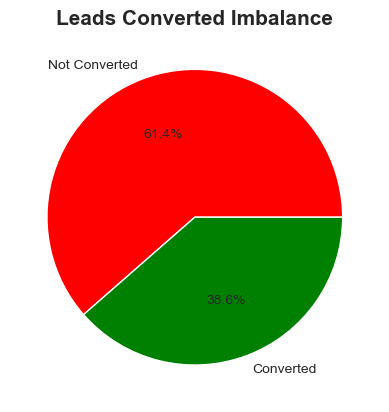

In [34]:
# imbalance between Converted and not converted

eda_ready_df['Converted'].value_counts().plot.pie(autopct='%.1f%%', labels=['Not Converted', 'Converted'], colors=['r', 'g'])
plt.ylabel('')
plt.title('Leads Converted Imbalance', fontsize=15, fontweight='bold')
plt.show()

>#### Out of all the prospects, 61.4% Leads were not converted, whereas 38.6% were converted

In [35]:
# function to plot bar chart
def plot_bar(df, col, xlabel):

    # Reorder the categories based on count
    order = df[col].value_counts().index

    sns.set_style('darkgrid')
    fig, axs = plt.subplots(figsize=(10, 5))

    sns.countplot(x=df[col], palette='Spectral_r', ax=axs, order=order)
    axs.set_xlabel(xlabel, fontsize=12)
    axs.set_ylabel('Count', fontsize=12)
    axs.set_xticklabels(axs.get_xticklabels(),rotation=90, fontsize=10)

    # Get the percentage of bars and show them inside the bars
    for p in axs.patches:
        height = p.get_height()
        label = axs.text(p.get_x() + p.get_width()/2., height + 3,
                '{:.1f}%'.format(height / len(df) * 100),
                ha='center', va='bottom')

        label.set_position((p.get_x() + p.get_width()/2., height/2))
        label.set_rotation(90)
        label.set_fontsize(9)
    plt.suptitle(xlabel, fontsize=15, fontweight='bold')
    plt.show()

#### Lead Source

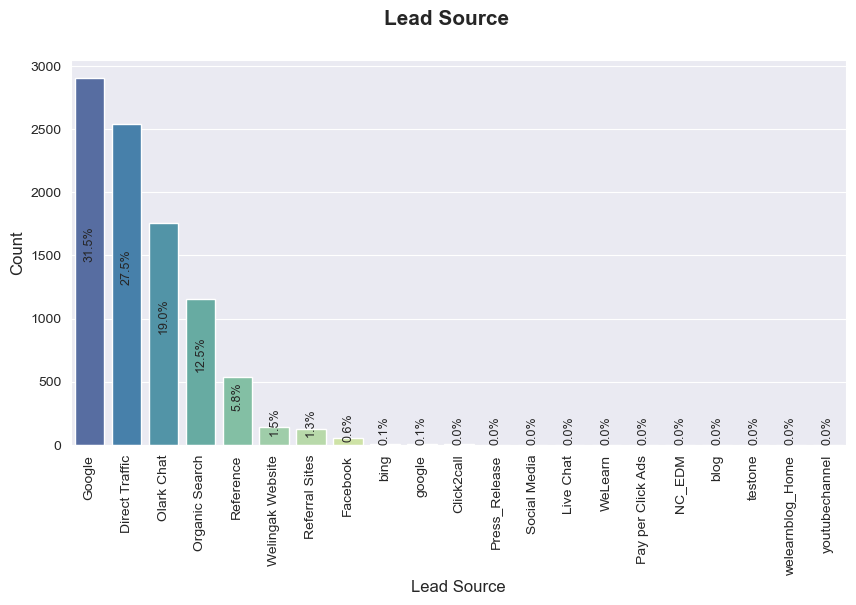

In [36]:
plot_bar(eda_ready_df, 'Lead Source', 'Lead Source')

>#### Most of the Leads came from Google, followed by Direct Traffic, Olark Chat and so on. Least came from Youtube Channel.

#### Lead Origin

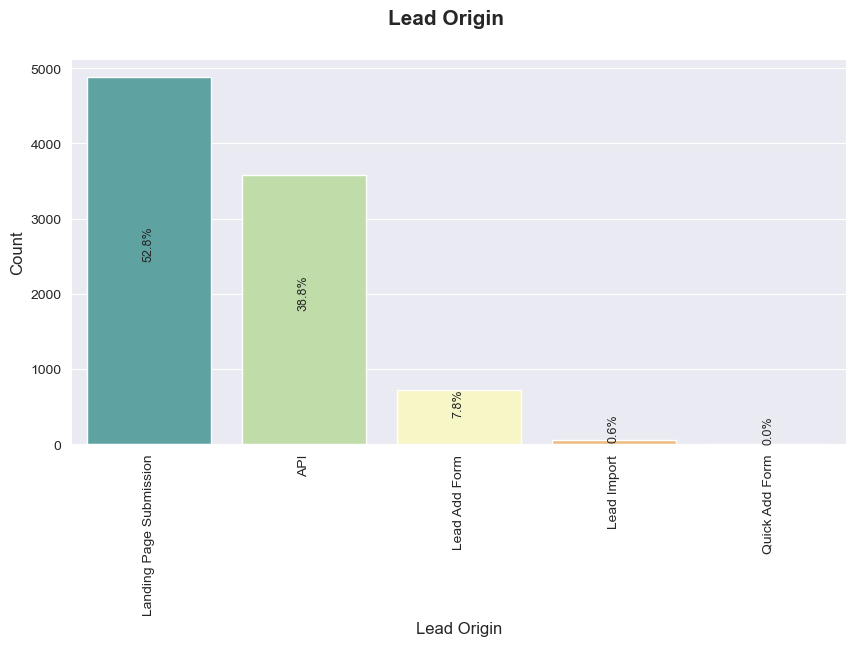

In [37]:
plot_bar(eda_ready_df, 'Lead Origin', 'Lead Origin')

>#### Most of the Lead Origin is from Lannding Page Submission, followed by API. Least came from Quick Add Form.

#### Country

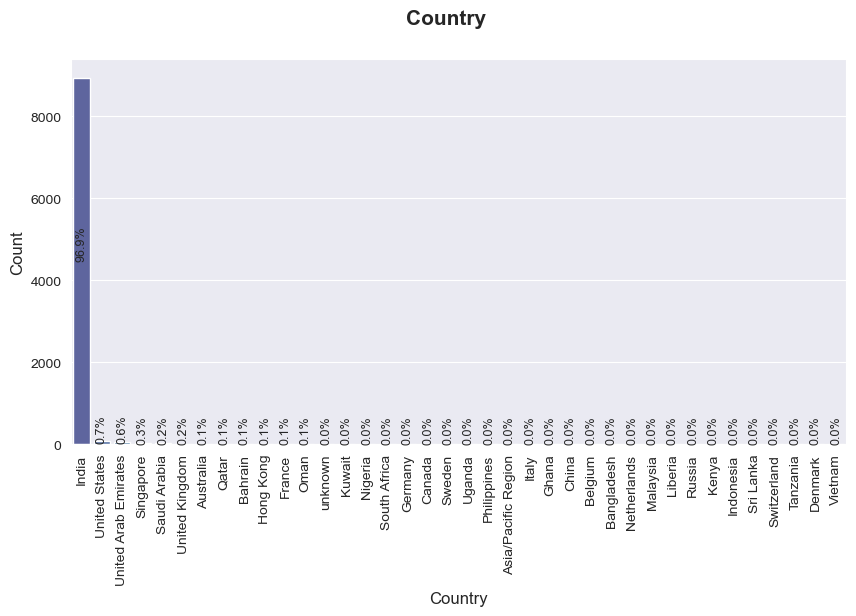

In [38]:
plot_bar(eda_ready_df, 'Country', 'Country')

>#### We see almost all of the Prospects are from India and some from USA

#### What is your current occupation

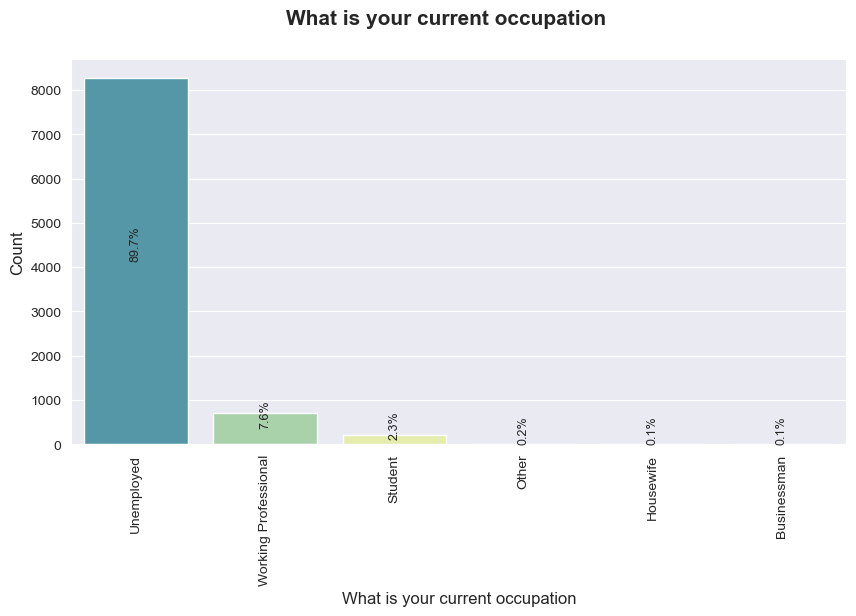

In [39]:
plot_bar(eda_ready_df, 'What is your current occupation', 'What is your current occupation')

>#### Unemployed is the highest in terms of occupation and least is Businessman

### Bi-Variate Analysis

In [40]:
# function to plot bar graph with Converted as Hue
def plot_bar_converted(df, col):
    plt.figure(figsize = (14,7))
    ax1=sns.countplot(x=col, hue='Converted', data=df, palette='terrain_r')
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
    plt.show()

#### Last Notable Activity

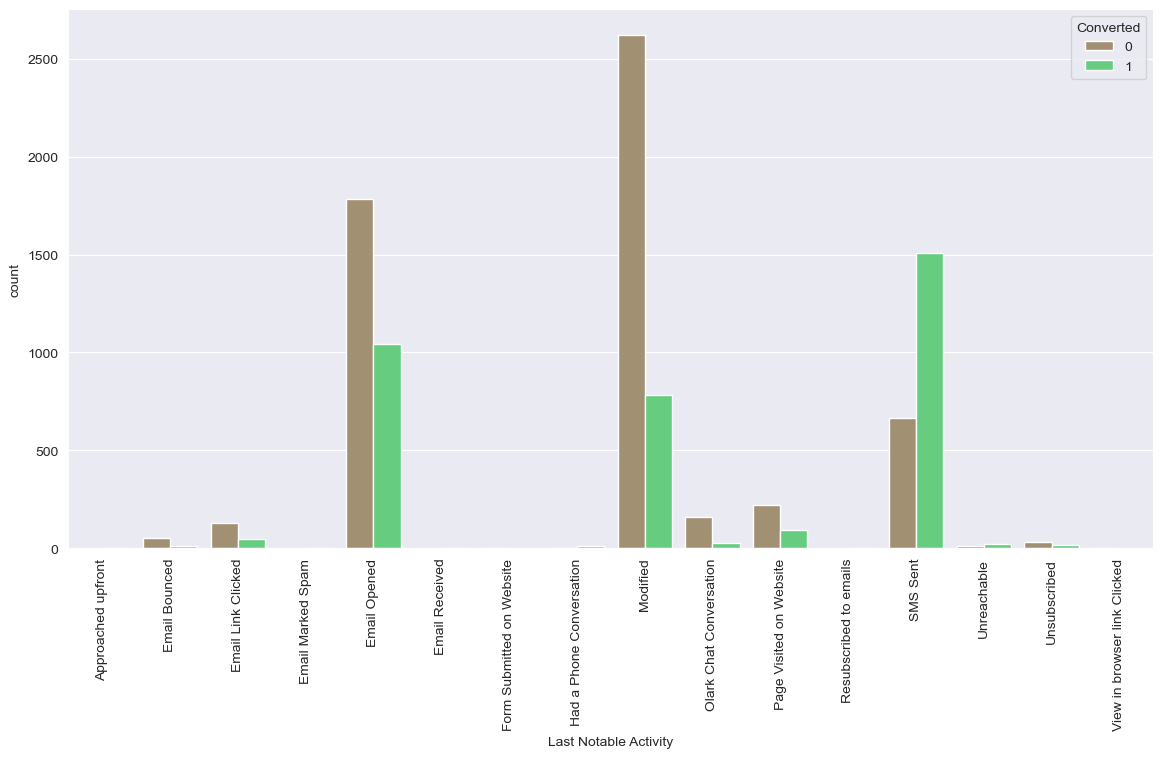

In [41]:
plot_bar_converted(eda_ready_df, 'Last Notable Activity')

>#### We can see that to those prospects SMS was sent, are more likely to get converted. Though the Email opened and Modified is high in numbers for Non-Converted Candidates

#### Lead Source

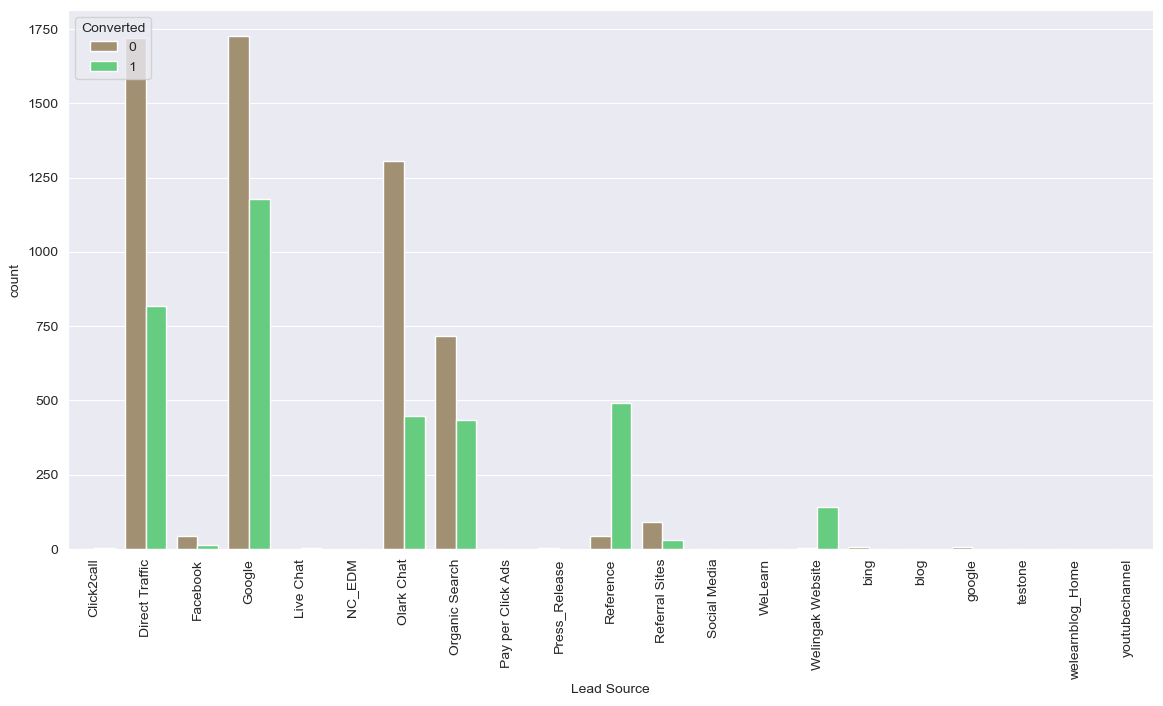

In [42]:
plot_bar_converted(eda_ready_df, 'Lead Source')

>#### Most of the sources are from Direct Traffic and Google and they both have high Converted and Non-Converted Rate. It's clearly evident that those persons who are a reference and came from Welingak Website, are more likely to get converted.

#### Last Activity

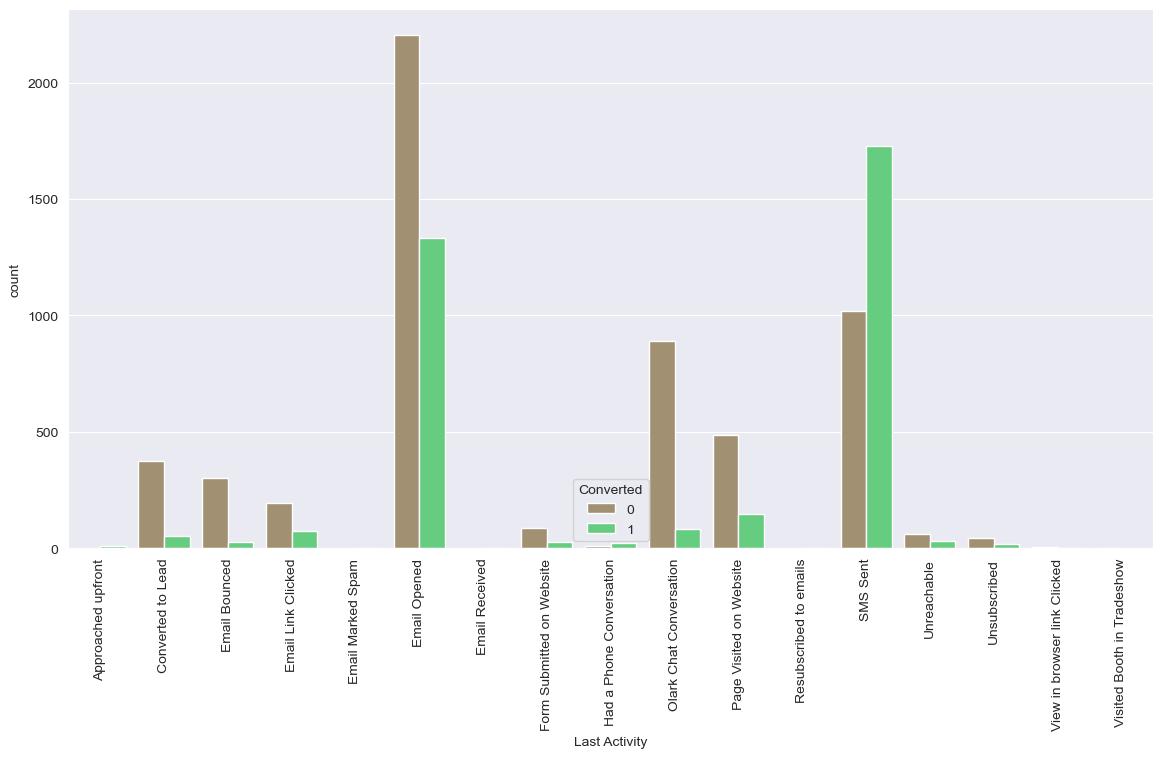

In [43]:
plot_bar_converted(eda_ready_df, 'Last Activity')

>#### It's very much simmilar with what we have already seen with Last Notable Activity

#### Lead Origin

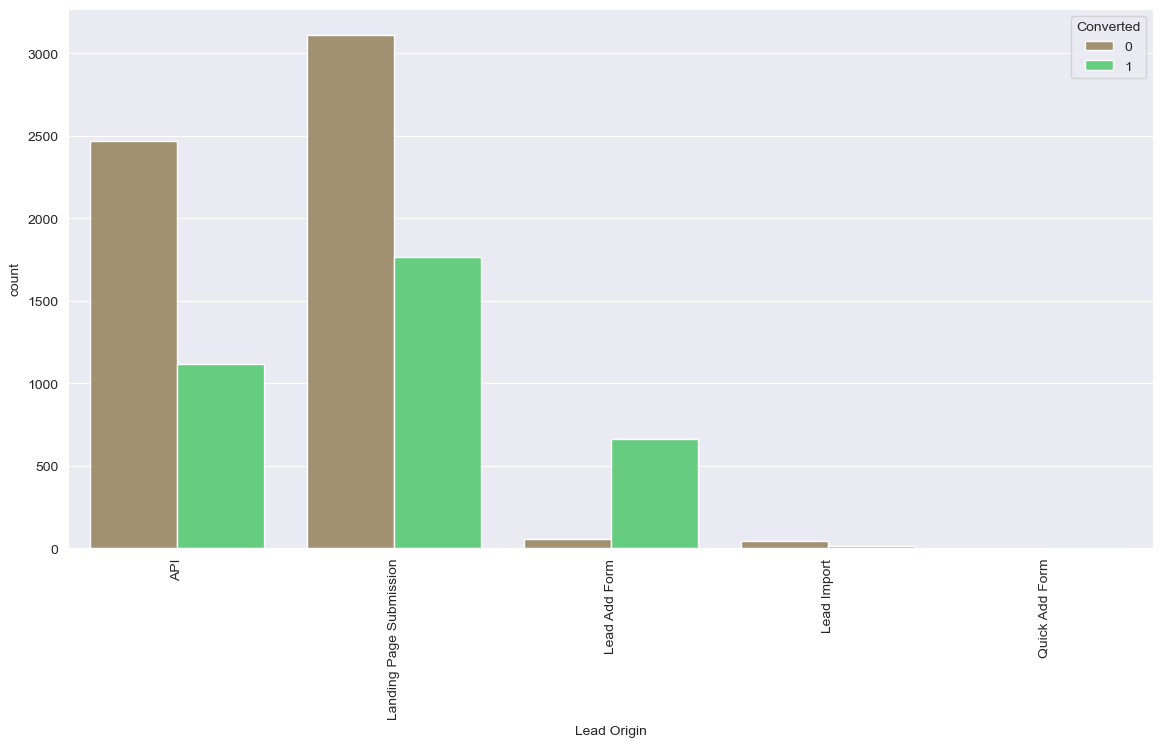

In [44]:
plot_bar_converted(eda_ready_df, 'Lead Origin')

>#### Most of the Lead origin are from API and Landing Page Submission. Prospects who's origin is Lead Add Form, are more likely to get converted than others.

#### What is your current occupation

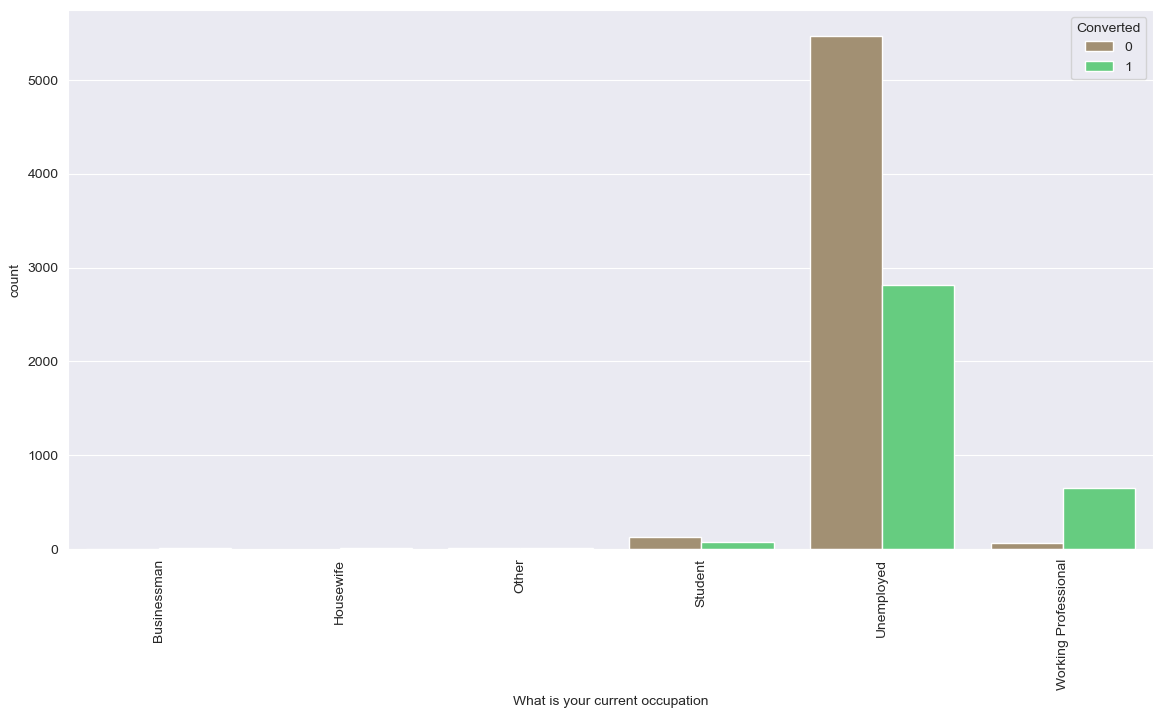

In [45]:
plot_bar_converted(eda_ready_df, 'What is your current occupation')

>#### Working Professionals are more very likely to get Converted whereas Unemployed persons are more likely to not get converted.

### Multi-Variate Analysis

#### Pairplot

* list of cols with continous numerical values

In [46]:
tmp = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

* Pairplot of all the numerical continous columns

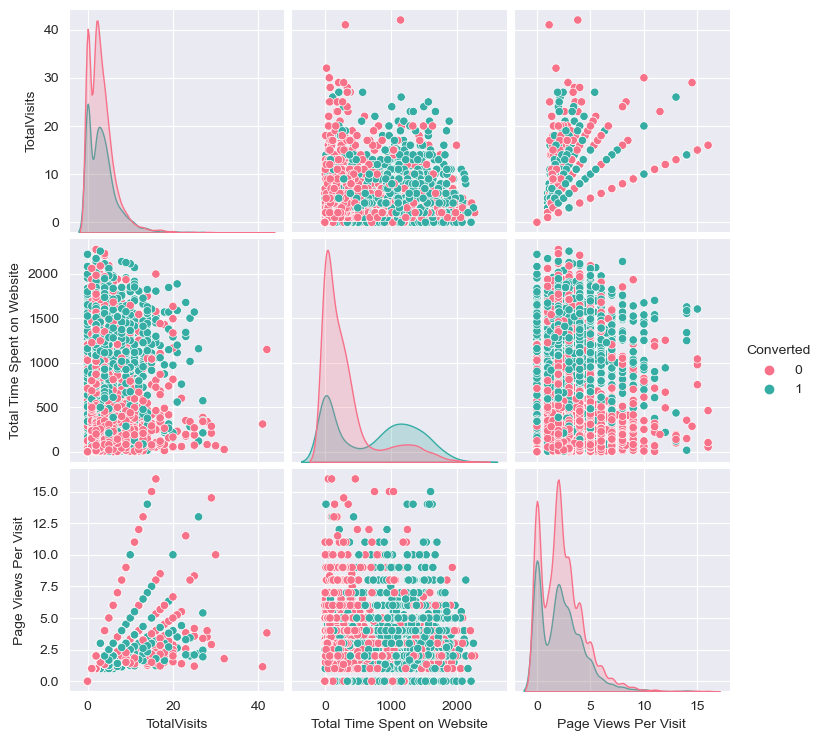

In [47]:
sns.pairplot(data=eda_ready_df,vars=tmp, hue='Converted', palette='husl')
plt.show()

>#### There is high correlation between Page Views Per Visit and Total Visits which is understandable.

In [48]:
# correlation matrix
eda_ready_df[tmp].corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
TotalVisits,1.000000,0.293338,0.674590
Total Time Spent on Website,0.293338,1.000000,0.311841
Page Views Per Visit,0.674590,0.311841,1.000000


#### Heatmap

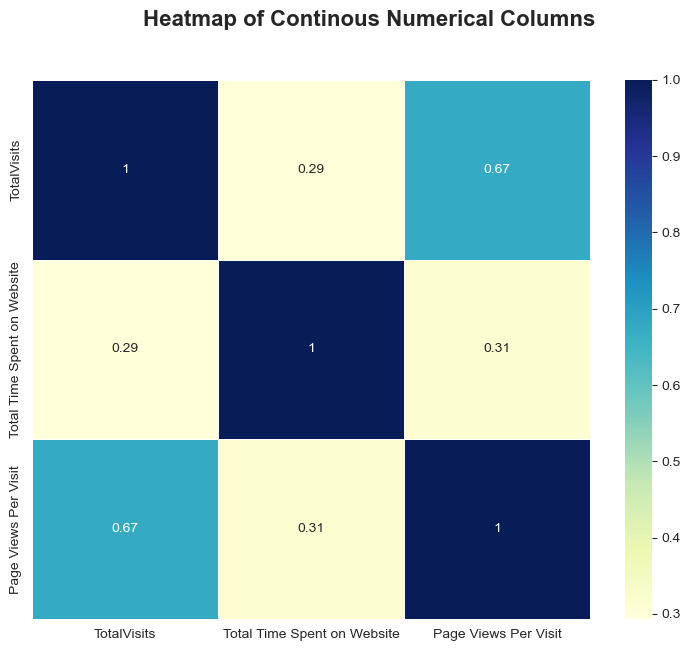

In [49]:
# plot heatmap
plt.figure(figsize=(9,7))
sns.heatmap(data=eda_ready_df[tmp].corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.suptitle('Heatmap of Continous Numerical Columns', fontsize=16, fontweight='bold')
plt.show()

>#### Except the high positive correlation between Total Visits and Page Views Per Visit, there is not much insight we can gather from here

In [50]:
data_prep_df = eda_ready_df

## Data Preparation

In [51]:
data_prep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9232 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9232 non-null   category
 1   Lead Source                                    9232 non-null   category
 2   Do Not Email                                   9232 non-null   category
 3   Do Not Call                                    9232 non-null   category
 4   Converted                                      9232 non-null   category
 5   TotalVisits                                    9232 non-null   float64 
 6   Total Time Spent on Website                    9232 non-null   int64   
 7   Page Views Per Visit                           9232 non-null   float64 
 8   Last Activity                                  9232 non-null   category
 9   Country                                  

* Converting "Converted" Column back to int64

In [52]:
data_prep_df['Converted'] = data_prep_df['Converted'].astype('int64')

* List and store all the column names where the dtype is Category

In [53]:
data_prep_df_dummy_cols = data_prep_df.select_dtypes(['category']).columns.to_list()
data_prep_df_dummy_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

### Create Dummy Variables

In [54]:
# creating the dummy variables
# dropping first dummy variable. if we have n number of category, we can have n-1 dummy variable and the last one obviously be that other category
data_prep_df_dummy = pd.get_dummies(data_prep_df[data_prep_df_dummy_cols], drop_first=True)
data_prep_df_dummy.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=108)

* concat data_prep_df and data_prep_df_dummy

In [55]:
data_prep_df = pd.concat([data_prep_df, data_prep_df_dummy], axis=1)
data_prep_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0


* Dropping cols for which dummies are already created

In [56]:
data_prep_df_dummy_cols

data_prep_df.drop(data_prep_df_dummy_cols, axis=1, inplace=True)

data_prep_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [57]:
data_prep_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


* Correlation matrix of all the numerical columns

In [58]:
data_prep_df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.032231,0.362787,-0.013552,-0.050774,0.321765,-0.023722,0.013141,-0.080461,-0.023722,...,-0.008244,0.043483,-0.244767,-0.072722,-0.035667,0.013141,0.352149,0.036593,-0.012880,-0.008244
TotalVisits,0.032231,1.000000,0.293338,0.674590,0.397606,-0.256909,-0.070712,-0.009943,0.119082,-0.069089,...,-0.003944,0.032559,-0.152609,-0.046951,0.227496,-0.009943,0.011623,0.010047,0.004031,0.014052
Total Time Spent on Website,0.362787,0.293338,1.000000,0.311841,0.276398,-0.139673,-0.034922,0.032851,0.133305,-0.033925,...,-0.003809,0.022284,-0.107078,-0.051388,0.026603,-0.009261,0.124967,0.008963,0.000524,-0.007570
Page Views Per Visit,-0.013552,0.674590,0.311841,1.000000,0.513138,-0.306546,-0.080905,-0.011606,0.144644,-0.078196,...,-0.001589,0.015349,-0.122480,-0.087687,0.026307,-0.011606,0.069210,0.021515,0.020207,0.001767
Lead Origin_Landing Page Submission,-0.050774,0.397606,0.276398,0.513138,1.000000,-0.307444,-0.081960,-0.011019,0.528149,-0.079140,...,0.009831,0.003352,-0.101415,-0.114751,0.044359,-0.011019,0.057639,0.000326,0.015736,-0.011019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Resubscribed to emails,0.013141,-0.009943,-0.009261,-0.011606,-0.011019,-0.003023,-0.000806,-0.000108,-0.006409,-0.000806,...,-0.000108,-0.000406,-0.007956,-0.001480,-0.001953,1.000000,-0.005771,-0.000614,-0.000745,-0.000108
Last Notable Activity_SMS Sent,0.352149,0.011623,0.124967,0.069210,0.057639,0.092655,-0.039608,-0.005771,0.019543,-0.036289,...,-0.005771,-0.021609,-0.423870,-0.078854,-0.104047,-0.005771,1.000000,-0.032702,-0.039665,-0.005771
Last Notable Activity_Unreachable,0.036593,0.010047,0.008963,0.021515,0.000326,0.003518,-0.004566,-0.000614,-0.015675,-0.004566,...,-0.000614,-0.002298,-0.045083,-0.008387,-0.011067,-0.000614,-0.032702,1.000000,-0.004219,-0.000614
Last Notable Activity_Unsubscribed,-0.012880,0.004031,0.000524,0.020207,0.015736,-0.009407,-0.005538,-0.000745,0.003678,-0.005538,...,-0.000745,-0.002788,-0.054682,-0.010173,-0.013423,-0.000745,-0.039665,-0.004219,1.000000,-0.000745


### Heatmap of all the numerical columns

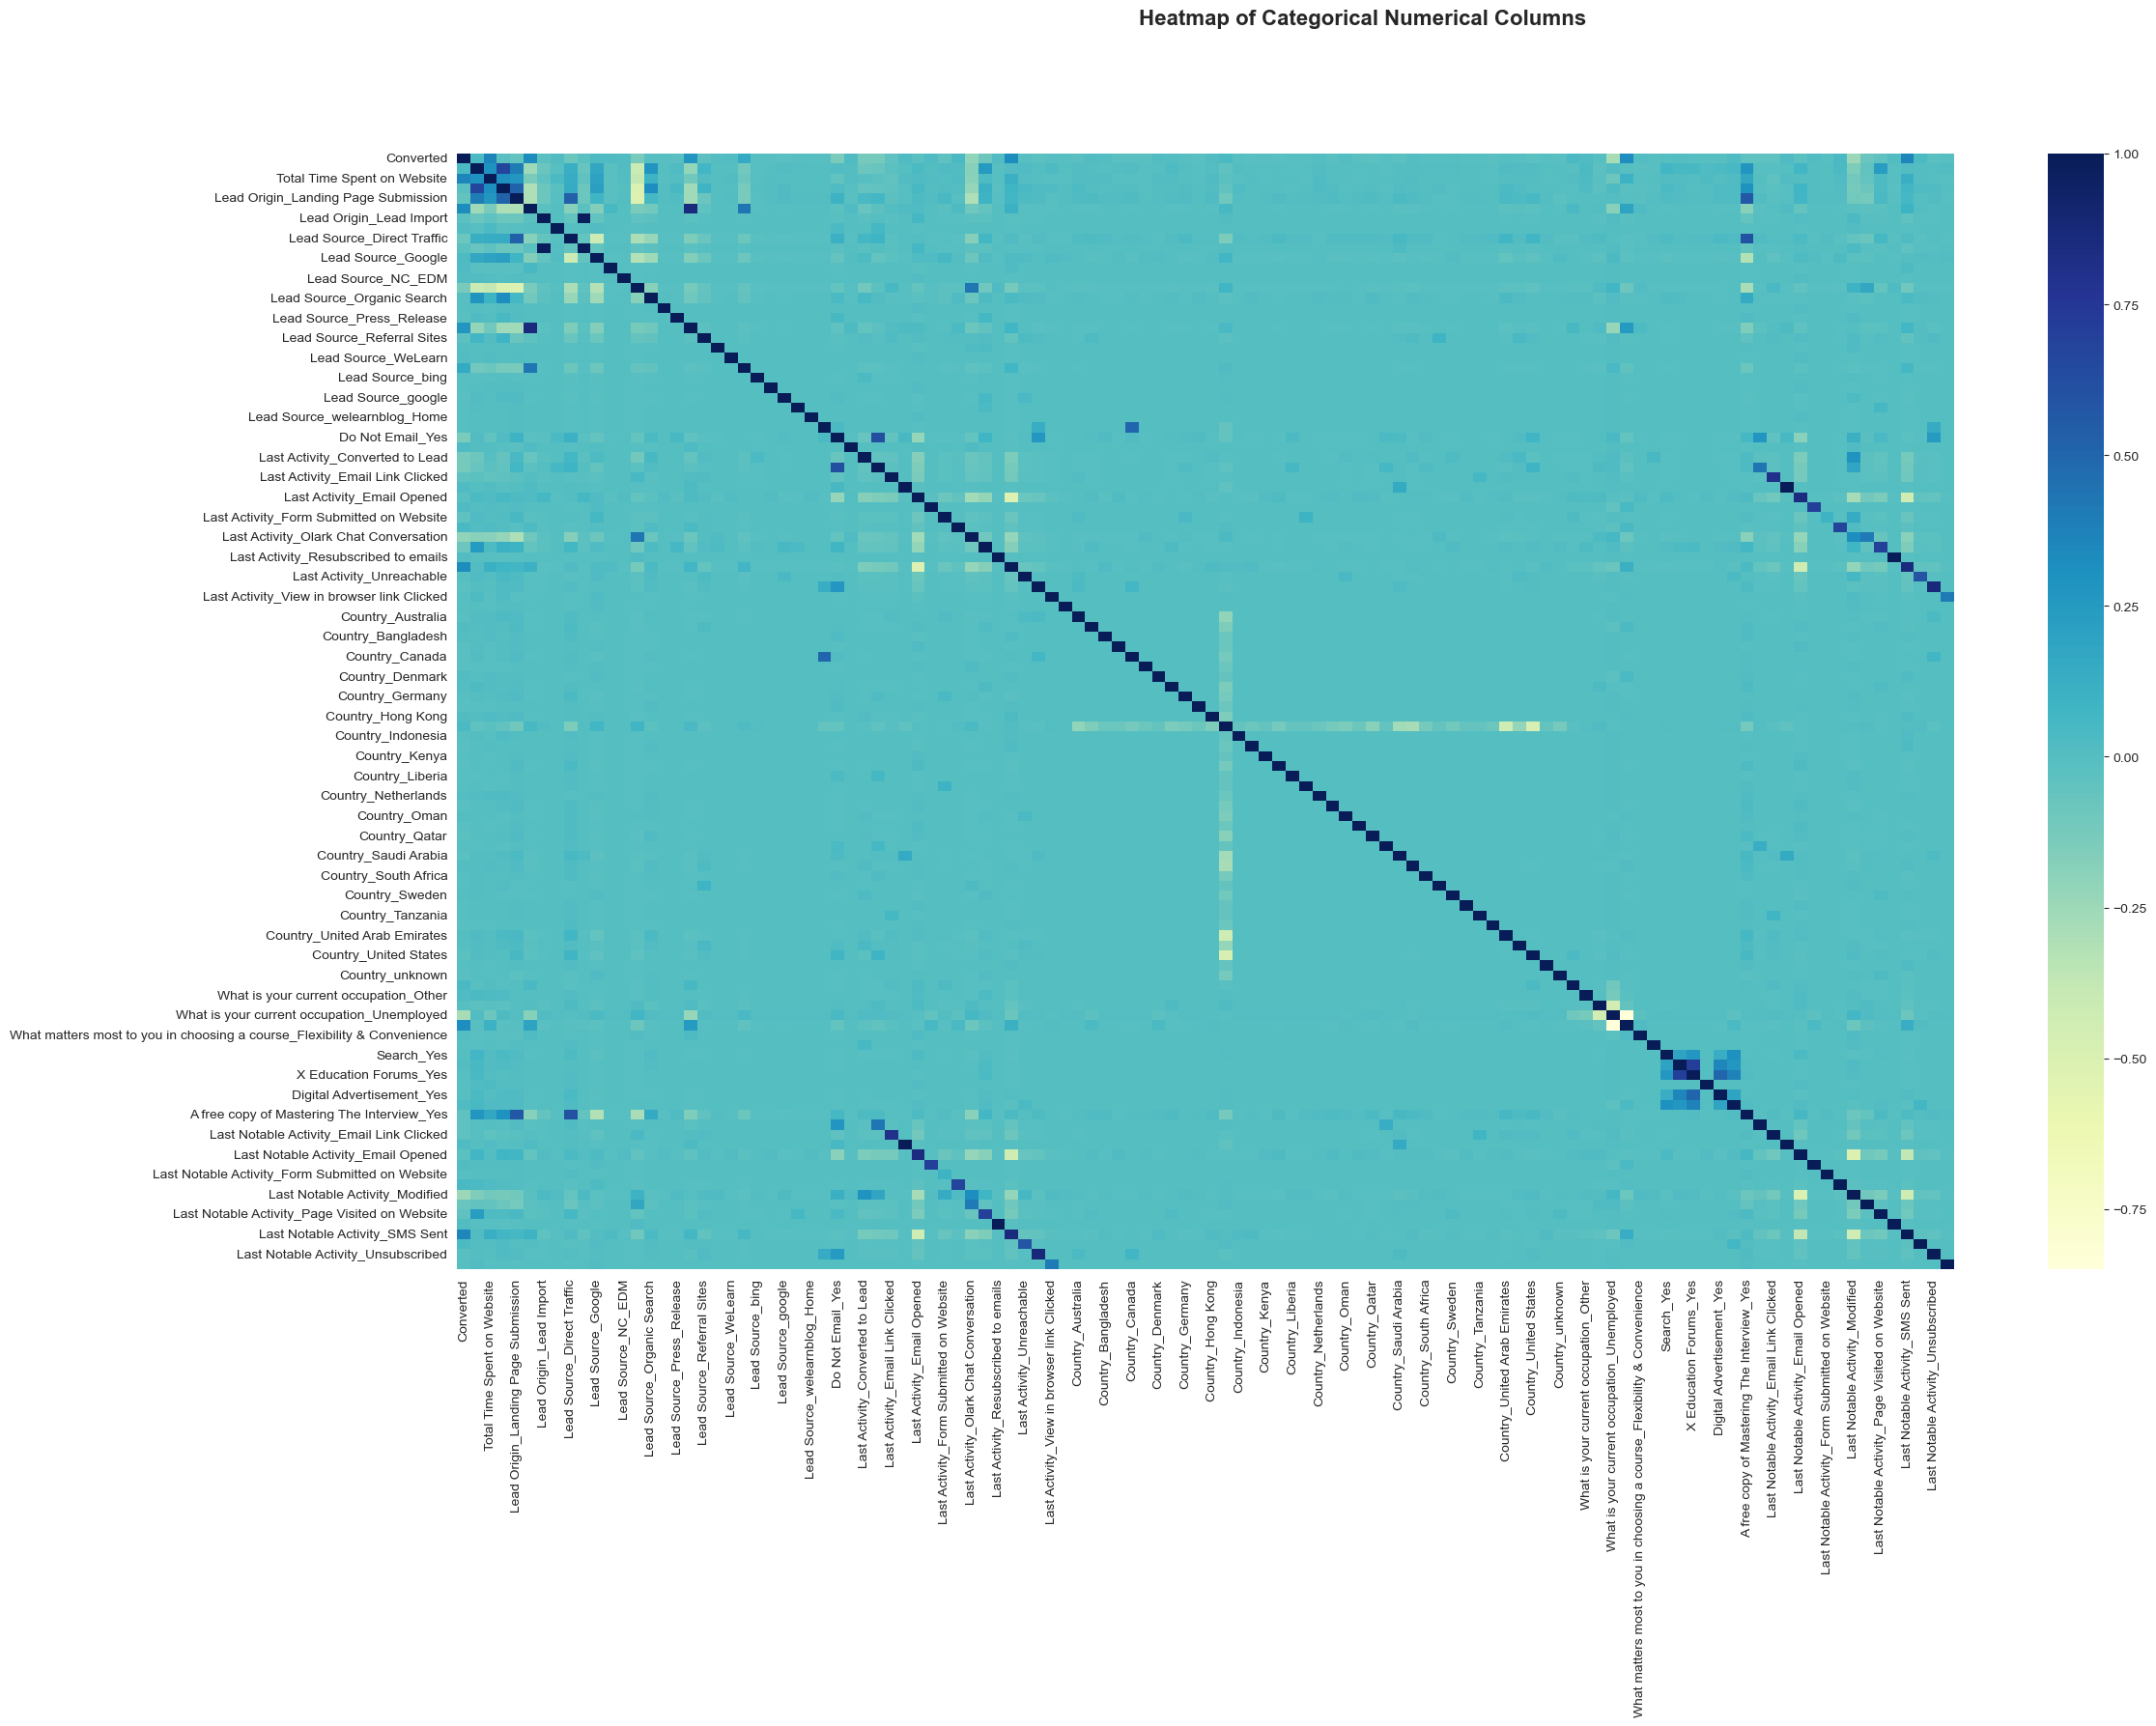

In [59]:
plt.figure(figsize = (25,15))
sns.heatmap(data=data_prep_df.corr(), annot=False, cmap='YlGnBu')
plt.suptitle('Heatmap of Categorical Numerical Columns', fontsize=16, fontweight='bold')
plt.show()

In [60]:
data_prep_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [61]:
model_ready_df = data_prep_df

### Train-Test Split

* Creating X and y dataset with "Converted" as the target value.

In [62]:
X = model_ready_df.drop(['Converted'], axis=1)
y = model_ready_df['Converted']

* Split the dataset into 70% train and 30% test

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=51)

In [64]:
X_train.shape

(6462, 111)

In [65]:
X_test.shape

(2770, 111)

In [66]:
y_train.shape

(6462,)

In [67]:
y_test.shape

(2770,)

### Scaling

We will use MinMaxScaler for scalling.

In [68]:
# scalling cols which are not dummuy variables and not categorical variables

# continous numerical values
tmp = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# scaler initiation
scaler = MinMaxScaler()

# fit the MinMaxScaler in the data
scaler.fit(X_train[tmp])

# transforming the data
X_train[tmp] = scaler.transform(X_train[tmp])

X_train[tmp].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
8664,0.190476,0.014647,0.1000
7615,0.047619,0.065690,0.1250
3332,0.142857,0.518420,0.1250
7527,0.000000,0.000000,0.0000
8834,0.166667,0.468265,0.4375


### Feature Selection using RFE

RFE will be used to select 15 features from the train dataset

In [69]:
logreg = LogisticRegression()

rfe = RFE(estimator=logreg, n_features_to_select=15)

# fit RFE on training data
rfe.fit(X_train, y_train)

# crreating a list with only the features which was selected by RFE
features_selected = X_train.columns[rfe.support_]
features_selected

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Country_Italy', 'Country_Saudi Arabia',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Build Models

* Custom defined function to build Logistic Regression models and also show information about VIF

In [70]:
# function to build model, print OLS Summary and VIF results
def build_model_show_vif(selected_df):

    # Add a constant, required by statsmodels
    X_train_internal = sm.add_constant(selected_df)

    # fit the model
    logreg_model = sm.GLM(y_train, X_train_internal, family=sm.families.Binomial())
    logreg_model_result = logreg_model.fit()

    # Print a summary of the linear regression model obtained
    print(logreg_model_result.summary())
    print('\n')
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('\n')

    # lets drop const col for now which we added before fitting the model
    X_train_internal.drop('const',axis=1, inplace=True)

    # Calculate VIF for each predictor variable
    vif = pd.DataFrame()
    vif['features'] = X_train_internal.columns
    vif['vif'] = [round(variance_inflation_factor(X_train_internal.values, i), 3) for i in range(X_train_internal.shape[1])]
    vif = vif.sort_values(by='vif', ascending=False)

    # View the VIF values
    print('VIF value of the Features >>')
    print(vif)

    return logreg_model, logreg_model_result

In [71]:
# using only selected features to build models
X_train_rfe = X_train[features_selected]

#### Model 1

In [72]:
# using X_train_rfe dataset

# saving Model 1 X_train dataset for future ref
X_train_model1 = X_train_rfe

# saving Model 1 for future ref
logreg_model1, logreg_model1_result = build_model_show_vif(X_train_model1)

# saving a new variable which is same as X_train_model1 but just with added const columns, for future ref
X_train_model1_sm_const = sm.add_constant(X_train_model1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2747.5
Date:                Wed, 02 Aug 2023   Deviance:                       5495.0
Time:                        22:20:41   Pearson chi2:                 6.98e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3835
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Ideally P value should not be more than 0.05. Here we can see that, P value is high in the below variables. Lets drop them and build our next models with the updated columns.
* Last Activity_Had a Phone Conversation
* Country_Italy
* Country_Saudi Arabia
* What is your current occupation_Housewife
* Last Notable Activity_Had a Phone Conversation

All VIFs are well within ideal range

#### Model 2

* Omitting above mentioned columns one by one in decreasing order pf p-value, and building model with the updated dataset

In [73]:
# using X_train_model1 dataset

# saving Model 2 X_train dataset for future ref
X_train_model2 = X_train_model1.drop(['Country_Italy'], axis=1)

# saving Model 2 for future ref
logreg_model2, logreg_model2_result = build_model_show_vif(X_train_model2)

# saving a new variable which is same as X_train_model2 but just with added const columns, for future ref
X_train_model2_sm_const = sm.add_constant(X_train_model2)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2750.1
Date:                Wed, 02 Aug 2023   Deviance:                       5500.2
Time:                        22:20:42   Pearson chi2:                 6.98e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3830
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Ideally P value should not be more than 0.05. Here we can see that, P value is high in the below variables. Lets drop them and build our next models with the updated columns.
* Last Activity_Had a Phone Conversation
* Country_Saudi Arabia
* What is your current occupation_Housewife
* Last Notable Activity_Had a Phone Conversation

All VIFs are well within ideal range

#### Model 3

* Omitting above mentioned columns one by one in decreasing order pf p-value, and building model with the updated dataset

In [74]:
# using X_train_model2 dataset

# saving Model 3 X_train dataset for future ref
X_train_model3 = X_train_model2.drop(['Last Notable Activity_Had a Phone Conversation'], axis=1)

# saving Model 3 for future ref
logreg_model3, logreg_model3_result = build_model_show_vif(X_train_model3)

# saving a new variable which is same as X_train_model3 but just with added const columns, for future ref
X_train_model3_sm_const = sm.add_constant(X_train_model3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2753.5
Date:                Wed, 02 Aug 2023   Deviance:                       5507.1
Time:                        22:20:42   Pearson chi2:                 7.01e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3824
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Ideally P value should not be more than 0.05. Here we can see that, P value is high in the below variables. Lets drop them and build our next models with the updated columns.
* Country_Saudi Arabia
* What is your current occupation_Housewife

All VIFs are well within ideal range

#### Model 4

* Omitting above mentioned columns one by one in decreasing order pf p-value, and building model with the updated dataset

In [75]:
# using X_train_model3 dataset

# saving Model 4 X_train dataset for future ref
X_train_model4 = X_train_model3.drop(['What is your current occupation_Housewife'], axis=1)

# saving Model 4 for future ref
logreg_model4, logreg_model4_result = build_model_show_vif(X_train_model4)

# saving a new variable which is same as X_train_model4 but just with added const columns, for future ref
X_train_model4_sm_const = sm.add_constant(X_train_model4)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2758.8
Date:                Wed, 02 Aug 2023   Deviance:                       5517.5
Time:                        22:20:43   Pearson chi2:                 7.03e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3814
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Ideally P value should not be more than 0.05. Here we can see that, P value is high in the below variables. Lets drop them and build our next models with the updated columns.
* Country_Saudi Arabia

All VIFs are well within ideal range

#### Model 5

* Omitting above mentioned columns one by one in decreasing order pf p-value, and building model with the updated dataset

In [76]:
# using X_train_model4 dataset

# saving Model 5 X_train dataset for future ref
X_train_model5 = X_train_model4.drop(['Country_Saudi Arabia'], axis=1)

# saving Model 5 for future ref
logreg_model5, logreg_model5_result = build_model_show_vif(X_train_model5)

# saving a new variable which is same as X_train_model5 but just with added const columns, for future ref
X_train_model5_sm_const = sm.add_constant(X_train_model5)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2760.6
Date:                Wed, 02 Aug 2023   Deviance:                       5521.3
Time:                        22:20:43   Pearson chi2:                 7.02e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3810
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Now, all the P values are below 0.05 which is good.

All VIFs are well within ideal range.

We can make this our final model and go ahead with the next step, which is Model Evaluation.

## Model Training

### Prediction on Train Data

In [77]:
X_train_model5_sm_const.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
8664,1.0,0.190476,0.014647,0,0,0,0,0,0,0,0,0
7615,1.0,0.047619,0.065690,0,0,0,0,0,0,0,0,0
3332,1.0,0.142857,0.518420,0,0,0,0,0,0,0,0,0
7527,1.0,0.000000,0.000000,0,1,0,1,0,1,0,0,0
8834,1.0,0.166667,0.468265,0,0,0,0,0,0,0,0,0


* Let's make prediction on Train data

In [78]:
# make prediction of y_train data
y_train_pred = logreg_model5_result.predict(X_train_model5_sm_const)

Predicted Values

In [79]:
y_train_pred.head()

8664    0.103697
7615    0.093762
3332    0.501215
7527    0.012516
8834    0.458928
dtype: float64

* Creating a dataframe with Actual Converted, and Model Predicted Conversion Probability

In [80]:
y_train_pred_result = pd.DataFrame({'Actual_Converted':y_train.values, 'Predicted_Conversion_Prob':y_train_pred.values})
y_train_pred_result.head()

,Actual_Converted,Predicted_Conversion_Prob
0,0,0.103697
1,0,0.093762
2,1,0.501215
3,0,0.012516
4,0,0.458928


We are taking threshold as 0.5 for now but later we will calculate and find out the value which is more accurate

In [81]:
# Set the threshold
threshold = 0.5

y_train_pred_result['Predicted_Converted'] = y_train_pred_result['Predicted_Conversion_Prob'].apply(lambda x: 1 if x > threshold else 0)
y_train_pred_result.head(10)

,Actual_Converted,Predicted_Conversion_Prob,Predicted_Converted
0,0,0.103697,0
1,0,0.093762,0
2,1,0.501215,1
3,0,0.012516,0
4,0,0.458928,0
5,1,0.301340,0
6,0,0.082787,0
7,0,0.162187,0
8,0,0.310826,0
9,1,0.811475,1


## Model Evaluation

### Confusion matrix

* The confusion matrix offers insights into how a binary classification model performs.

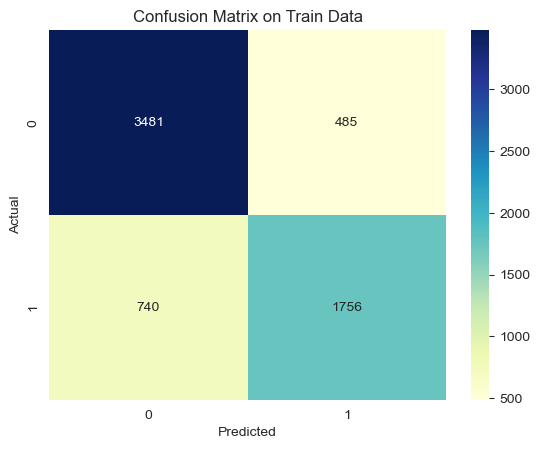

In [82]:
# Calculate the confusion matrix
confusion_train = metrics.confusion_matrix(y_train_pred_result['Actual_Converted'], y_train_pred_result['Predicted_Converted'])

# heatmap of the confusion matrix
sns.heatmap(confusion_train, annot=True, cmap='YlGnBu', fmt='d')

# Add labels, title, and ticks to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Train Data')
plt.show()


> Here, the model accurately identified 3481 cases as the positive class (actual converted) and 1756 cases as the negative class (actual not converted). However, it also made 485 incorrect positive predictions (predicted as converted, but actually not converted) and 740 incorrect negative predictions (predicted as not converted, but actually converted).

### Model Overall Accuracy

In [83]:
# Let's check the overall accuracy

model_accuracy_train = metrics.accuracy_score(y_train_pred_result['Actual_Converted'], y_train_pred_result['Predicted_Converted'])
print('Model Accuracy: {}%'.format(round((model_accuracy_train*100), 2)))

Model Accuracy: 81.04%


> Our Model accuracy score is 81.04% which is good as it has correctly predicted 81.04% data in the train dataset

### Sensitivity, Specificity, Postive Rate & Negative Rate

In [84]:
tp = confusion_train[1,1] # true positive
tn = confusion_train[0,0] # true negatives
fp = confusion_train[0,1] # false positives
fn = confusion_train[1,0] # false negatives


sensitivity_train = round(tp/(tp+fn), 2)
print ('Sensitivity: ', sensitivity_train)

specificity_train = round(tn/(tn+fp), 2)
print ('Specificity: ', specificity_train)

positive_rate_train = round(tp/(fp+tp), 2)
print ('Positive Rate: ', positive_rate_train)

# Calculate negative predictive value
negative_rate_train = round(tn/(tn+fn), 2)
print('Negative Rate: ', negative_rate_train)

Sensitivity:  0.7
Specificity:  0.88
Positive Rate:  0.78
Negative Rate:  0.82


> The model's sensitivity (true positive rate) of 0.7 signifies the percentage of actual positive instances correctly classified. Its specificity (true negative rate) of 0.88 signifies the percentage of actual negative instances correctly classified. The positive rate (precision) of 0.78 represents the proportion of predicted positive instances that are truly positive. The negative rate of 0.82 indicates the proportion of predicted negative instances that are actually negative.

### ROC Curve

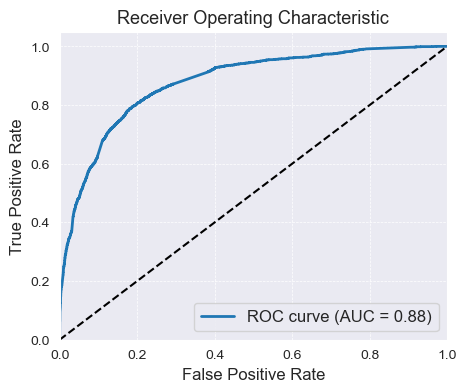

In [85]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_result['Actual_Converted'], y_train_pred_result['Predicted_Conversion_Prob'])
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic', fontsize=13)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


> With an ROC AUC (Receiver Operating Characteristic Area Under the Curve) value of 0.88, the model demonstrates strong discriminatory ability in differentiating between positive and negative instances. A higher ROC AUC value (ranging from 0 to 1) indicates a greater accuracy in classifying instances. In this specific case, an ROC AUC of 0.88 indicates that the model performs well in accurately predicting the conversion flag.

### Finding the Optimal Cutoff

In [86]:
# different probability cutoff columns from 0.0 to 0.9
optimal_cutoff = [float(x)/10 for x in range(10)]
for cutoff in optimal_cutoff:
    y_train_pred_result[cutoff] = y_train_pred_result['Predicted_Conversion_Prob'].map(lambda x: 1 if x > cutoff else 0)

# create a pd Dataframe to store the results
optimal_cutoff_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

# Calculate metrics for each probability cutoff
for cutoff in optimal_cutoff:
    cm = metrics.confusion_matrix(y_train_pred_result['Actual_Converted'], y_train_pred_result[cutoff])
    total = np.sum(cm)
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    optimal_cutoff_df.loc[cutoff] = [cutoff, accuracy, sensitivity, specificity]

print(optimal_cutoff_df)


     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.386258     1.000000     0.000000
0.1          0.1  0.587279     0.967548     0.347958
0.2          0.2  0.726400     0.922276     0.603127
0.3          0.3  0.792015     0.835337     0.764750
0.4          0.4  0.806871     0.768029     0.831316
0.5          0.5  0.810430     0.703526     0.877711
0.6          0.6  0.791241     0.582131     0.922844
0.7          0.7  0.774373     0.501202     0.946293
0.8          0.8  0.738162     0.371795     0.968734
0.9          0.9  0.705509     0.256010     0.988401


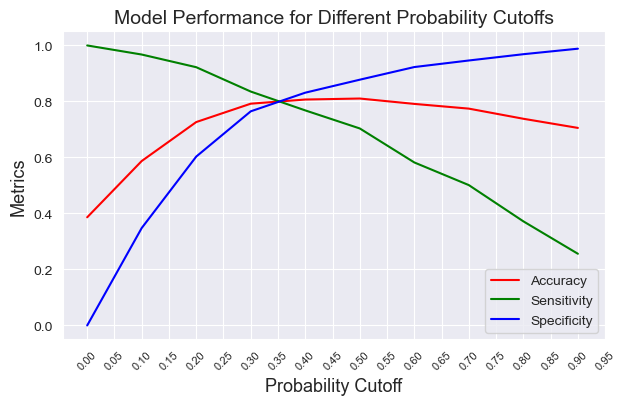

In [87]:
# Plot accuracy, sensitivity, and specificity curves
plt.figure(figsize=(7, 4))
sns.lineplot(x='Probability', y='value', hue='variable', data=pd.melt(optimal_cutoff_df, ['Probability']),
             palette=['red', 'green', 'blue'])

# Set x-axis and y-axis labels
plt.xlabel('Probability Cutoff', fontsize=13)
plt.ylabel('Metrics', fontsize=13)

# Set title and legend
plt.title('Model Performance for Different Probability Cutoffs', fontsize=14)
plt.legend(fontsize=10)

# Set x-tick labels
plt.xticks(np.arange(0, 1, step=0.05), size=8, rotation=45)

# Set y-tick labels
plt.yticks(size=10)

# Show the plot
plt.show()

> Based on the depicted curve, it is evident that the optimal cutoff point is around 0.35. At this specific threshold, the model attains a harmonious equilibrium between accuracy, sensitivity, and specificity. Consequently, the model becomes adept at accurately classifying both positive and negative instances without exhibiting bias towards either category.

In [88]:
# Apply the cutoff
y_train_pred_result['Final_Predicted_Converted'] = np.where(y_train_pred_result['Predicted_Conversion_Prob'] > 0.35, 1, 0)

# final prediction
y_train_pred_result.head()


,Actual_Converted,Predicted_Conversion_Prob,Predicted_Converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted_Converted
0,0,0.103697,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.093762,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.501215,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.012516,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.458928,0,1,1,1,1,1,0,0,0,0,0,1


In [89]:
# Check accuracy score

model_accuracy_train_final = metrics.accuracy_score(y_train_pred_result['Actual_Converted'], y_train_pred_result['Final_Predicted_Converted'])
print('Final Model Accuracy: {}%'.format(round((model_accuracy_train_final*100), 2)))

Final Model Accuracy: 80.19%


### Confusion matrix

Lets calculate the Confusion Matrix again for updated Prediction Value

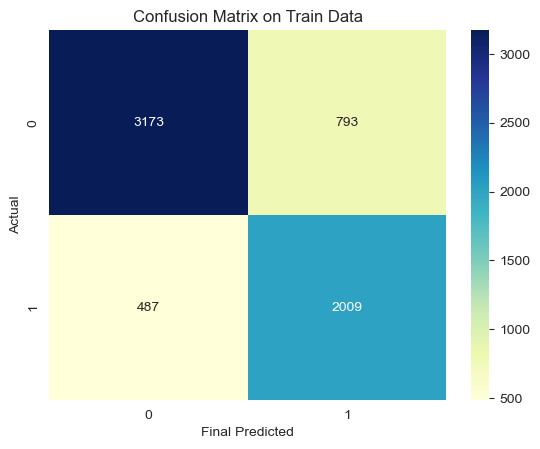

In [90]:
# Calculate the confusion matrix
confusion_train2 = metrics.confusion_matrix(y_train_pred_result['Actual_Converted'], y_train_pred_result['Final_Predicted_Converted'])

# heatmap of the confusion matrix
sns.heatmap(confusion_train2, annot=True, cmap='YlGnBu', fmt='d')

# Add labels, title, and ticks to the plot
plt.xlabel('Final Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Train Data')
plt.show()


### Sensitivity, Specificity, Postive Rate & Negative Rate

Let's evaluate the other metrics as well

In [91]:
tp = confusion_train2[1,1] # true positive
tn = confusion_train2[0,0] # true negatives
fp = confusion_train2[0,1] # false positives
fn = confusion_train2[1,0] # false negatives


sensitivity_train = round(tp/(tp+fn), 2)
print ('Sensitivity: ', sensitivity_train)

specificity_train = round(tn/(tn+fp), 2)
print ('Specificity: ', specificity_train)

positive_rate_train = round(tp/(fp+tp), 2)
print ('Positive Rate: ', positive_rate_train)

# Calculate negative predictive value
negative_rate_train = round(tn/(tn+fn), 2)
print('Negative Rate: ', negative_rate_train)

Sensitivity:  0.8
Specificity:  0.8
Positive Rate:  0.72
Negative Rate:  0.87


> By looking at the updated Model Metrics, we can confirm that after changing the probability cutoff from 0.50 to 0.35, the Model Performance has improved.

### Precision and Recall

In [92]:
# precision metrics
precision = metrics.precision_score(y_train_pred_result['Actual_Converted'], y_train_pred_result['Final_Predicted_Converted'])

# recall metrics
recall = metrics.recall_score(y_train_pred_result['Actual_Converted'], y_train_pred_result['Final_Predicted_Converted'])

print("Precision Score:", round(precision, 2))
print("Recall Score:", round(recall, 2))

Precision Score: 0.72
Recall Score: 0.8


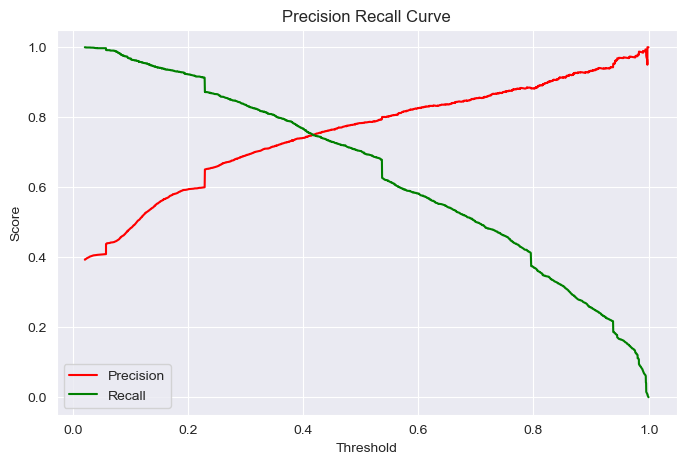

In [93]:
p, r, thresholds = metrics.precision_recall_curve(y_train_pred_result['Actual_Converted'], y_train_pred_result['Predicted_Conversion_Prob'])

plt.figure(figsize=(8, 5))
plt.plot(thresholds, p[:-1], "r-", label="Precision")
plt.plot(thresholds, r[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision Recall Curve")
plt.show()


> The point where the precision and recall curves intersect, with a score of 0.7 and a threshold of 0.4, indicates a well-balanced performance of the model. It demonstrates the model's ability to accurately identify positive instances while effectively minimizing false positives.

### Prediction on Test Data

* Scalling

In [94]:
# continous numerical values
tmp = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# transforming the data
X_test[tmp] = scaler.transform(X_test[tmp])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
9020,0.071429,0.169552,0.1875,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
688,0.071429,0.528628,0.1875,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5936,0.190476,0.032845,0.5000,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1307,0.119048,0.403018,0.3125,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3686,0.071429,0.177097,0.1875,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


* Using Final model columns and only use them in X_test test data

In [95]:
X_test = X_test[X_train_model5.columns]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
9020,0.071429,0.169552,0,0,0,0,0,0,1,0,0
688,0.071429,0.528628,0,0,0,0,0,0,0,0,0
5936,0.190476,0.032845,0,0,0,1,0,0,0,0,0
1307,0.119048,0.403018,0,0,0,0,0,0,1,0,0
3686,0.071429,0.177097,0,0,0,0,0,0,1,0,0


* Making Prediction

In [96]:
# Add constant to the feature matrix
X_test = sm.add_constant(X_test)

# predict model on the test data
y_test_pred = logreg_model5_result.predict(X_test)
y_test_pred

9020    0.406056
688     0.469991
5936    0.025437
1307    0.687506
3686    0.414302
          ...   
2936    0.576039
5674    0.195458
7127    0.729855
8466    0.877046
340     0.205360
Length: 2770, dtype: float64

* a new Dataframe to store actual converted and Model predicted probability from Test Data

In [97]:
y_test_pred_result = pd.DataFrame({'Actual_Converted':y_test.values, 'Predicted_Conversion_Prob':y_test_pred.values})
y_test_pred_result.head()

,Actual_Converted,Predicted_Conversion_Prob
0,1,0.406056
1,0,0.469991
2,0,0.025437
3,1,0.687506
4,1,0.414302


In [98]:
# Check y_test_pred_result
y_test_pred_result.head()

,Actual_Converted,Predicted_Conversion_Prob
0,1,0.406056
1,0,0.469991
2,0,0.025437
3,1,0.687506
4,1,0.414302


By using probability cutoff 0.35, creating a new column Final_Predicted_Converted

In [99]:
# Make predictions on the test set using 0.35 as the cutoff
y_test_pred_result['Final_Predicted_Converted'] = y_test_pred_result['Predicted_Conversion_Prob'].map(lambda x: 1 if x > 0.35 else 0)

# Check y_test_pred_result
y_test_pred_result.head()

,Actual_Converted,Predicted_Conversion_Prob,Final_Predicted_Converted
0,1,0.406056,1
1,0,0.469991,1
2,0,0.025437,0
3,1,0.687506,1
4,1,0.414302,1


In [100]:
# Calculate the lead score based on the final prediction

y_test_pred_result['Lead Score'] = round(y_test_pred_result['Predicted_Conversion_Prob'] * 100)
y_test_pred_result.head()

,Actual_Converted,Predicted_Conversion_Prob,Final_Predicted_Converted,Lead Score
0,1,0.406056,1,41.0
1,0,0.469991,1,47.0
2,0,0.025437,0,3.0
3,1,0.687506,1,69.0
4,1,0.414302,1,41.0


* Confusion Matrix

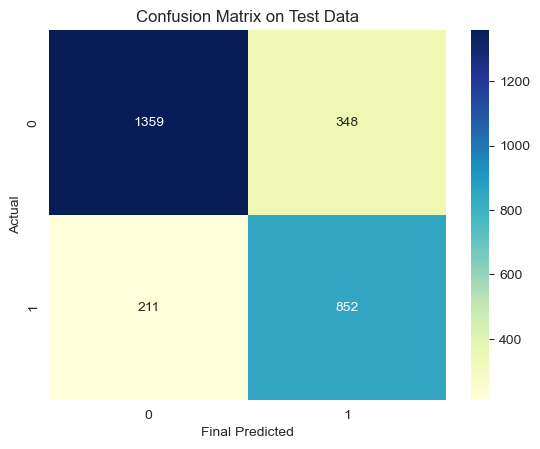

In [101]:
confusion2 = metrics.confusion_matrix(y_test_pred_result['Actual_Converted'], y_test_pred_result['Final_Predicted_Converted'] )

# heatmap of the confusion matrix
sns.heatmap(confusion2, annot=True, cmap='YlGnBu', fmt='d')

# Add labels, title, and ticks to the plot
plt.xlabel('Final Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Data')
plt.show()

* Sensitivity, Specificity, Postive Rate & Negative Rate

In [102]:
tp = confusion2[1,1] # true positive
tn = confusion2[0,0] # true negatives
fp = confusion2[0,1] # false positives
fn = confusion2[1,0] # false negatives


sensitivity_test = round(tp/(tp+fn), 2)
print ('Sensitivity: ', sensitivity_test)

specificity_test = round(tn/(tn+fp), 2)
print ('Specificity: ', specificity_test)

positive_rate_test = round(tp/(fp+tp), 2)
print ('Positive Rate: ', positive_rate_test)

# Calculate negative predictive value
negative_rate_test = round(tn/(tn+fn), 2)
print('Negative Rate: ', negative_rate_test)

Sensitivity:  0.8
Specificity:  0.8
Positive Rate:  0.71
Negative Rate:  0.87


* Model Accuracy on the Test Data

In [103]:
# check the overall model accuracy

model_accuracy_test_final = metrics.accuracy_score(y_test_pred_result['Actual_Converted'], y_test_pred_result['Final_Predicted_Converted'])
print('Final Model Accuracy: {}%'.format(round((model_accuracy_test_final*100), 2)))

Final Model Accuracy: 79.82%


>### Based on the provided code and the resulting accuracy of 79.82%, it can be deduced that the model achieves an accuracy of 79.82% in predicting the conversion outcome of the test dataset. This implies that approximately 79.82% of the model's predictions for converted cases in the test dataset were accurate.